# Reality Check #1: Kinematics of the Stewart Platform

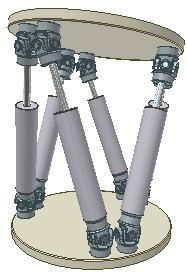

A Stewart platform consists of six variable length struts, or prismatic joints, supporting a payload.  Prismatic joints operate by changing the length of the strut, usually pneumatically or hydraulically. As a six-degree-of-freedom robot, the Stewart platform can be placed at any point and inclination in three-dimensional space that is within its reach.

To simplify matters, the project concerns a two-dimensional version of the Stewart platform. It will model a manipulator composed of a triangular platform in a fixed plane controlled by three struts, as shown in Figure 1.14. The inner triangle represents the planar Stewart platform whose dimensions are defined by the three lengths $L_1$, $L_2$, and $L_3$. Let $\gamma$ denote the angle across from side $L_1$. The position of the platform is controlled by the three numbers $p_1$, $p_2$, and $p_3$, the variable lengths of the three struts.

Finding the position of the platform, given the three strut lengths, is called the forward, or direct, kinematics problem for this manipulator. Namely, the problem is to compute $(x, y)$ and $\theta$ for each given $p_1$, $p_2$, $p_3$. Since there are three degrees of freedom, it is natural to expect three numbers to specify the position. For motion planning, it is important to solve this problem as fast as possible, often in real time. Unfortunately, no closed-form solution of the planar Stewart platform forward kinematics problem is known.

The best current methods involve reducing the geometry of Figure 1.14 to a single equation and solving it by using one of the solvers explained in this chapter. Your job is to complete the derivation of this equation and write code to carry out its solution.

Simple trigonometry applied to Figure 1.14 implies the following three equations:
\begin{eqnarray}
p_1^2 & = & x^2 + y ^2\\
p_2^2 & = & ( x + A_2 ) ^2 + ( y + B_2 ) ^2\\
p_3^2 & = & ( x + A_3 ) ^2 + ( y + B_3 ) ^2\quad\quad (1.38)
\end{eqnarray}

In these equations,
\begin{eqnarray}
A_2 & = & L_2 \cos \theta + x_1 \\
B_2 & = & L_3 \sin \theta \\
A_3 & = & L_2 \cos ( \theta + \gamma ) - x_2 = L_2 \left[ \cos ( \theta )\cos ( \gamma ) - \sin ( \theta )\sin ( \gamma ) \right] - x_2 \\
B_3 & = & L_2 \sin ( \theta + \gamma ) - y_2 = L_2 \left[ \cos ( \theta )\sin ( \gamma ) + \sin ( \theta )\cos ( \gamma ) \right] - y_2 \\
\end{eqnarray}

Note that (1.38) solves the inverse kinematics problem of the planar Stewart platform, which is to find $p_1$, $p_2$, $p_3$, given $x$, $y$, $\theta$. Your goal is to solve the forward problem, namely, to find $x$, $y$, $\theta$, given $p_1$, $p_2$, $p_3$.

Multiplying out the last two equations of (1.38) and using the first yields
\begin{eqnarray}
p_2^2 & = & x^2 + y^2 + 2 A_2 x + 2 B_2 y + A_2^2 + B_2^2 = p_1^2 + 2 A_2 x + 2 B_2 y + A_2^2 + B_2^2\\
p_3^2 & = & x^2 + y^2 + 2 A_3 x + 2 B_3 y + A_3^2 + B_3^2 = p_1^2 + 2 A_3 x + 2 B_3 y + A_3^2 + B_3^2
\end{eqnarray}
which can be solved for $x$ and $y$ as
\begin{eqnarray}
x & = & \frac{N_1}{D} = \frac{B_3(p_2^2-p_1^2-A_2^2-B_2^2)-B_2(p_3^2-p_1^2-A_3^2-B_3^2)}{2 ( A_2B_3 - B_2A_3 )}\\
y & = & \frac{N_2}{D} = \frac{-A_3(p_2^2-p_1^2-A_2^2-B_2^2)+A_2(p_3^2-p_1^2-A_3^2-B_3^2)}{2 ( A_2B_3 - B_2A_3 )}\quad\quad (1.39)
\end{eqnarray}
as long as $D = 2 ( A_2B_3 - B_2A_3 ) \ne 0$.

Substituting these expressions for $x$ and $y$ into the first equation of (1.38), and multiplying through by $D^2$, yields one equation, namely,
$$ f = N_1^2 + N_2^2 - p_1^2 D^2 = 0\quad\quad (1.40)$$
in the single unknown $\theta$. (Recall that $p_1$, $p_2$, $p_3$, $L_1$, $L_2$, $L_3$, $\gamma$, $x_1$, $x_2$, $y_2$ are known.) If the roots of $f(\theta)$ can be found, the corresponding $x$-and $y$-values follow immediately from (1.39).

Note that $f(\theta)$ is a polynomial in $\sin\theta$ and $\cos\theta$, so, given any root $\theta$, there are other roots $\theta + 2 \pi k$ that are equivalent for the platform. For that reason, we can restrict attention to $\theta$ in $[−\pi,\pi]$. It can be shown that $f(\theta)$ has at most six roots in that interval.

# Suggested Activities

In [ ]:
from math import pi
from math import sqrt
from math import cos
from math import sin
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve

In [ ]:
def compute_N1_N2_D( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the position of the anchor of the struts
#   shared  : p1, p2, p3: defines the length of the struts

#   input   : theta
#   output  : N1, N2, D

    A2 = L3 * cos( theta ) - x1

    B2 = L3 * sin( theta )

    A3 = L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2

    B3 = L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2

    A1 = ( p2 ** 2 ) - ( p1 ** 2 ) - ( A2 ** 2 ) - ( B2 ** 2 )

    B1 = ( p3 ** 2 ) - ( p1 ** 2 ) - ( A3 ** 2 ) - ( B3 ** 2 )

    N1 =   B3 * A1 - B2 * B1

    N2 = - A3 * A1 + A2 * B1

    D = 2. * ( A2 * B3 - B2 * A3 )

    return N1, N2, D

def f( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the positions of the anchor of the struts
#   shared  : p1, p2, p3: defines the lengths of the struts

#   input   : theta
#   output  : 0       if theta leads to a (theta,x,y) consistent with (p1,p2,p3)
#             .not. 0 if theta does not lead to a feasible solution

    N1, N2, D = compute_N1_N2_D( theta )

    return ( N1 ** 2 ) + ( N2 **2 ) - ( p1 ** 2 ) * ( D**2 )

#   return ( ( (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) * (( p2 ** 2 ) - ( p1 ** 2 ) - ( L3 * cos( theta ) - x1 ) ** 2 - ( ( L3 * sin( theta ) ) ** 2 )) - ( L3 * sin( theta ) ) * (( p3 ** 2 ) - ( p1 ** 2 ) - ( ( L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2 ) ** 2 ) - ( (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) ** 2 )) ) ** 2 ) \
#   + ( ( - (L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2) * (( p2 ** 2 ) - ( p1 ** 2 ) - ( L3 * cos( theta ) - x1 ) ** 2 - ( ( L3 * sin( theta ) ) ** 2 )) + ( L3 * cos( theta ) - x1 ) * (( p3 ** 2 ) - ( p1 ** 2 ) - ( ( L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2 ) ** 2 ) - ( (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) ** 2 )) ) **2 ) \
#   - 4 * ( p1 ** 2 ) * ( ( L3 * cos( theta ) - x1 ) * (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) \
#   - ( L3 * sin( theta ) ) * ( L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2 ) )**2


def compute_x_and_y( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the positions of the anchor of the struts
#   shared  : p1, p2, p3: defines the lengths of the struts

#   input   : theta
#   output  : x, y: such that (theta, x, y) represents the position of the
#             platform

#   note: it does not make sense to call this routine if theta is not a root of
#   f(theta)

    N1, N2, D = compute_N1_N2_D( theta )

    x = N1 / D

    y = N2 / D

    if ( abs( ( N1 ** 2 ) + ( N2 **2 ) - ( p1 ** 2 ) * ( D**2 ) ) > 1e-4 ):
        print("warning: compute_x_and_y: theta is not a root of f(theta),"\
              "therefore the lengths of the struts (p1, p2, p3) and|",\
              "the positions (theta,x,y) of the platform are not consistent.")

    return x, y

def compute_platform_corners( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the positions of the anchor of the struts
#   shared  : p1, p2, p3: defines the lengths of the struts

#   input   : theta
#   output  : u1, u2, u3, v1, v2, v3: the positions of the three corners (u1,v1),
#             (u2,v2), and (u3,v3) of our platform

    x, y = compute_x_and_y( theta )

    u1 = x
    u2 = x + L3 * cos( theta )
    u3 = x + L2 * cos( theta + gamma )
    v1 = y
    v2 = y + L3 * sin( theta )
    v3 = y + L2 * sin( theta + gamma )

    return u1, u2, u3, v1, v2, v3

def check_strut_lengths_from_corners( u1, u2, u3, v1, v2, v3):

#   shared  : x1, x2, y2: defines the positions of the anchor of the struts

#   input   : u1, u2, u3, v1, v2, v3: the positions of the three corners (u1,v1),
#             (u2,v2), and (u3,v3) of our platform

    p1 = sqrt( u1 ** 2 + v1 ** 2 )
    p2 = sqrt( ( u2 - x1 ) ** 2 + ( v2 ) ** 2 )
    p3 = sqrt( ( u3 - x2 ) ** 2 + ( v3 - y2 ) ** 2 )

    return p1, p2, p3

def plot_platform( u1, u2, u3, v1, v2, v3, ax ):

    ax.plot( [ u1, u2, u3, u1 ], [ v1, v2, v3, v1 ], '-r', linewidth=5 )

    ax.plot( [ u1 ], [ v1 ], 'om', markersize=10 )
    ax.plot( [  0 ], [  0 ], 'sm', markersize=10 )
    ax.plot( [ 0, u1 ], [ 0, v1 ], '-m', linewidth=2 )
    p1 = sqrt( u1**2 + v1 **2 )

    ax.plot( [ u2 ], [ v2 ], 'og', markersize=10 )
    ax.plot( [ x1 ], [  0 ], 'sg', markersize=10 )
    ax.plot( [ x1, u2 ], [ 0, v2 ], '-g', linewidth=2 )
    p2 = sqrt( ( u2 - x1 )**2 + ( v2 )**2 )

    ax.plot( [ u3 ], [ v3 ], 'ob', markersize=10 )
    ax.plot( [ x2 ], [ y2 ], 'sb', markersize=10 )
    ax.plot( [ x2, u3 ], [ y2, v3 ], '-b', linewidth=2 )
    p3 = sqrt( ( u3 - x2 )**2 + ( v3 - y2 )**2 )

    ax.set_aspect('equal', adjustable='box')

    ax.title.set_text( r"$\theta = $" + f"{theta:f}" )

    ax.set_xticks(np.arange(-10,10))
    ax.set_yticks(np.arange(-10,10))

    ax.grid()

#1.
Write a Python function for $f(\theta)$. The parameters $L_1$, $L_2$, $L_3$, $\gamma$, $x_1$, $x_2$, $y_2$ are fixed constants passed as shared variables, and the strut lengths $p_1$, $p_2$, $p_3$ will be known for a given pose and passed as shared variables. To test your code, set the parameters $L_1 = 2$, $L_2 = L_3 = \sqrt{2}$, $\gamma=\pi/2$, $p_1 = p_2 = p_3 = \sqrt{5}$ from Figure 1.15. Then, substituting $\theta = -\pi/4$ or $\theta = \pi/4$, corresponding to Figures 1.15(a, b), respectively, should make $f(\theta) = 0$.

In [ ]:
# set the dimensions of our platform

L2 = sqrt(2.)

L3 = sqrt(2.)

gamma = pi / 2.

# set the positions of the anchors of the struts

x1 = 4.

x2 = 0.

y2 = 4.

# set the lengths of the struts

p1 = sqrt( 5. )

p2 = sqrt( 5. )

p3 = sqrt( 5. )

# compute the backward error for the ``solution`` theta = pi / 4
# and theta = - pi/4.

roots = [ pi/4., -pi/4.]

for theta in roots:

    print( "backward error = | f( theta ) | = ", f"{abs( f ( theta ) ):6.2e}" )

backward error = | f( theta ) | =  4.55e-13
backward error = | f( theta ) | =  4.55e-13


# 2.
Plot $f(\theta)$ on $[−\pi,\pi]$. As a check of your work, there should be roots at $\pm \pi /4 $.

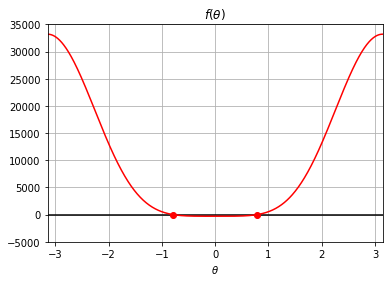

In [ ]:
xx = np.linspace( -pi, pi, 10)
yy = np.zeros([10])
plt.plot(xx, yy, '-k' );
xx = np.linspace( -pi, pi, 1000)
yy = [f(x) for x in xx]
plt.plot(xx, yy, '-r');
plt.plot( roots, np.zeros( len(roots) ), 'ro');
plt.title(r'$f(\theta)$')
plt.xlabel(r'$\theta$')
plt.xlim([ -pi, pi ])
plt.ylim([-5000., 35000.])
plt.grid()
plt.show()

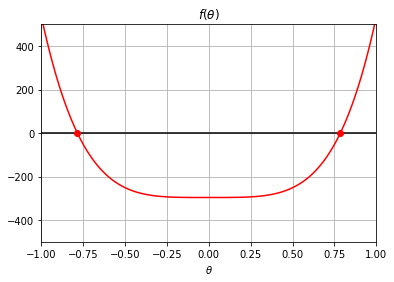

In [ ]:
# let us zoom with the y-axis from -500 to 500
xx = np.linspace( -pi, pi, 10)
yy = np.zeros([10])
plt.plot(xx, yy, '-k' );
xx = np.linspace( -pi, pi, 1000)
yy = [f(x) for x in xx]
plt.plot(xx, yy, '-r');
plt.plot( roots, np.zeros( len(roots) ), 'ro');
plt.title(r'$f(\theta)$')
plt.xlabel(r'$\theta$')
plt.xlim([ -1., 1. ])
plt.ylim([-500., 500.])
plt.grid()
plt.show()

# 3.
Reproduce Figure 1.15.

dimensions of platform:  L2 = 1.4142 ; L3 = 1.4142 gamma = 1.5708
position of anchors:     x1 = 4.0000 ; x2 = 0.0000 ; y2 = 4.0000
lengths of struts:       p1 = 2.2361 ; p2 = 2.2361 ; p3 = 2.2361

theta =  0.7854 ; (x,y) = ( 2.00 , 1.00 );
(u1,v1) = ( 2.00 , 1.00 ); (u2,v2) = ( 3.00 , 2.00 ); (u3,v3) = ( 1.00 , 2.00 ); 
lengths of struts (recomputed):       p1 = 2.2361 ; p2 = 2.2361 ; p3 = 2.2361
absolute (backward) error on strut lengths:  0.00e+00
relative backward error = | f(theta) |    :  4.55e-13

theta =  -0.7854 ; (x,y) = ( 1.00 , 2.00 );
(u1,v1) = ( 1.00 , 2.00 ); (u2,v2) = ( 2.00 , 1.00 ); (u3,v3) = ( 2.00 , 3.00 ); 
lengths of struts (recomputed):       p1 = 2.2361 ; p2 = 2.2361 ; p3 = 2.2361
absolute (backward) error on strut lengths:  0.00e+00
relative backward error = | f(theta) |    :  4.55e-13


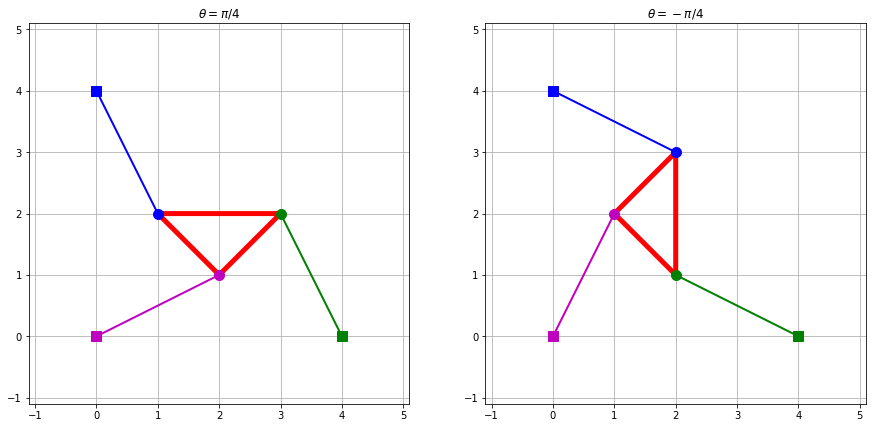

In [ ]:
# For theta =  pi/4, the coordinates of the three points of
# the platform, (u1,v1), (u2,v2), and (u3,v3), are
# (u1,v1) = (2,1); (u2,v2) = (3,2); and (u3,v3) = (1,2).
#
# For theta = -pi/4, the coordinates of the three points of
# the platform, (u1,v1), (u2,v2), and (u3,v3), are
# (u1,v1) = (1,2); (u2,v2) = (2,1); and (u3,v3) = (2,3).
#
# check that compute_platform_corners

print( "dimensions of platform: ", "L2 =", f"{L2:6.4f}", "; L3 =", f"{L3:6.4f}", "gamma =", f"{gamma:6.4f}"  )
print( "position of anchors:    ", "x1 =", f"{x1:6.4f}", "; x2 =", f"{x2:6.4f}", "; y2 =", f"{y2:6.4f}" )
print( "lengths of struts:      ", "p1 =", f"{p1:6.4f}", "; p2 =", f"{p2:6.4f}", "; p3 =", f"{p3:6.4f}" )

roots = [ pi / 4., -pi / 4. ]

save_plt_rcParams = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [ 15., 15. ]

fig, ax = plt.subplots( 1, len(roots) )

for theta, ax1 in zip( roots, ax ):
    plot_platform( *compute_platform_corners( theta ), ax1 )
    ax1.set_xlim([ -1.1, 5.1 ])
    ax1.set_ylim([ -1.1, 5.1 ])

ax[0].title.set_text( r"$\theta = \pi / 4$" )
ax[1].title.set_text( r"$\theta = - \pi / 4$" )

plt.rcParams['figure.figsize'] = save_plt_rcParams

for theta in roots:
    x, y = compute_x_and_y( theta )
    print("\ntheta = ", f"{theta:6.4f}", "; (x,y) = (", f"{x:4.2f}",",",f"{y:4.2f}",");")
    u1, u2, u3, v1, v2, v3 = compute_platform_corners( theta )
    print("(u1,v1) = (", f"{u1:4.2f}",",",f"{v1:4.2f}","); "\
          "(u2,v2) = (", f"{u2:4.2f}",",",f"{v2:4.2f}","); "\
          "(u3,v3) = (", f"{u3:4.2f}",",",f"{v3:4.2f}","); ")

    p1x, p2x, p3x = check_strut_lengths_from_corners( *compute_platform_corners( theta ) )
    print( "lengths of struts (recomputed):      ", "p1 =", f"{p1x:6.4f}", "; p2 =", f"{p2x:6.4f}", "; p3 =", f"{p3x:6.4f}" )
    print( "absolute (backward) error on strut lengths: ", f"{max( [ abs( p1 - p1x )/abs(p1), abs( p1 - p1x )/abs(p1), abs( p1 - p1x )/abs(p1) ] ):6.2e}" )
    print( "relative backward error = | f(theta) |    : ", f"{abs(f(theta)):6.2e}" )

# 4.
Solve the forward kinematics problem for the planar Stewart platform specified by $x_1 = 5$, $(x_2, y_2) = (0,6)$, $L_1 = L_3 = 3$, $L_2 = 3 \sqrt{2}$, $\gamma = \pi/4$, $p_1 = p_2 = 5$, $p_3 = 3$. Begin by plotting $f(\theta)$. Use an equation solver to find all four poses, and plot them. Check your answers by verifying that $p_1$, $p_2$, $p_3$ are the lengths of the struts in your plot.

In [ ]:
# set the dimensions of our platform

L2 = 3 * sqrt(2)

L3 = 3

gamma = pi/4

# set the positions of the anchors of the struts

x1 = 5

x2 = 0

y2 = 6

# set the lengths of the struts

p1 = 5

p2 = 5

p3 = 3

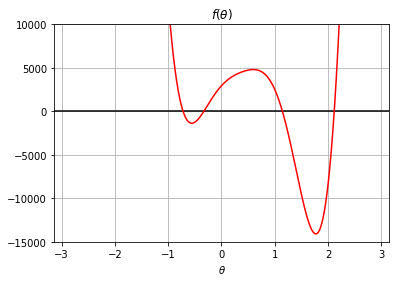

In [ ]:
xx = np.linspace( -pi, pi, 10)
yy = np.zeros([10])
plt.plot(xx, yy, '-k' );
xx = np.linspace( -pi, pi, 1000)
yy = [f(x) for x in xx]
plt.plot(xx, yy, '-r');
plt.title(r'$f(\theta)$')
plt.xlabel(r'$\theta$')
plt.xlim([ -pi, pi ])
plt.ylim([-15000., 10000.])
plt.grid()
plt.show()

In [ ]:
initial_guesses = [ -1., -0.5, 1., 2. ]
roots = np.zeros( len( initial_guesses ) )
for i, x0 in enumerate( initial_guesses ):
    roots[i] = scipy.optimize.fsolve( f, x0 )[0]
    print( "scipy.optimize.fsolve found root theta = ", f"{roots[i]:10.6f}",\
           ", backward error = ", f"{abs( f( roots[i] ) ):5.1e}" )

# make sure
# * scipy.optimize.fsolve converges so check backward error is small, check for error messages
# * four distinct roots
# * between -pi and pi

scipy.optimize.fsolve found root theta =   -0.720849 , backward error =  8.4e-10
scipy.optimize.fsolve found root theta =   -0.331005 , backward error =  0.0e+00
scipy.optimize.fsolve found root theta =    1.143686 , backward error =  6.9e-11
scipy.optimize.fsolve found root theta =    2.115909 , backward error =  3.0e-08


dimensions of platform:  L2 = 4.2426 ; L3 = 3.0000 gamma = 0.7854
position of anchors:     x1 = 5.0000 ; x2 = 0.0000 ; y2 = 6.0000
lengths of struts:       p1 = 5.0000 ; p2 = 5.0000 ; p3 = 3.0000

theta =  -0.7208 ; (x,y) = ( -1.38 , 4.81 );
(u1,v1) = ( -1.38 , 4.81 ); (u2,v2) = ( 0.88 , 2.83 ); (u3,v3) = ( 2.86 , 5.08 ); 
lengths of struts (recomputed):       p1 = 5.0000 ; p2 = 5.0000 ; p3 = 3.0000
absolute (backward) error on strut lengths:  7.46e-15
relative backward error = | f(theta) |    :  8.44e-10

theta =  -0.3310 ; (x,y) = ( -0.91 , 4.92 );
(u1,v1) = ( -0.91 , 4.92 ); (u2,v2) = ( 1.92 , 3.94 ); (u3,v3) = ( 2.90 , 6.78 ); 
lengths of struts (recomputed):       p1 = 5.0000 ; p2 = 5.0000 ; p3 = 3.0000
absolute (backward) error on strut lengths:  0.00e+00
relative backward error = | f(theta) |    :  0.00e+00

theta =  1.1437 ; (x,y) = ( 4.48 , 2.22 );
(u1,v1) = ( 4.48 , 2.22 ); (u2,v2) = ( 5.72 , 4.95 ); (u3,v3) = ( 2.99 , 6.19 ); 
lengths of struts (recomputed):       p1 = 5.000

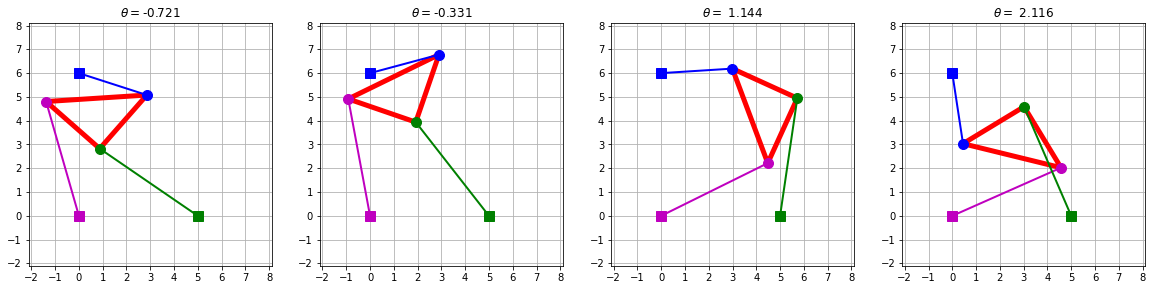

In [ ]:
print( "dimensions of platform: ", "L2 =", f"{L2:6.4f}", "; L3 =", f"{L3:6.4f}", "gamma =", f"{gamma:6.4f}"  )
print( "position of anchors:    ", "x1 =", f"{x1:6.4f}", "; x2 =", f"{x2:6.4f}", "; y2 =", f"{y2:6.4f}" )
print( "lengths of struts:      ", "p1 =", f"{p1:6.4f}", "; p2 =", f"{p2:6.4f}", "; p3 =", f"{p3:6.4f}" )


save_plt_rcParams = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [ 20., 20. ]

fig, ax = plt.subplots(1, len(roots) )

for theta, ax1 in zip( roots, ax ):
    plot_platform( *compute_platform_corners( theta ), ax1 )
    ax1.set_xlim([ -2.1, 8.1 ])
    ax1.set_ylim([ -2.1, 8.1 ])
    ax1.title.set_text( r"$\theta = $" + f"{theta:6.3f}" )

plt.rcParams['figure.figsize'] = save_plt_rcParams


for theta in roots:
    x, y = compute_x_and_y( theta )
    print("\ntheta = ", f"{theta:6.4f}", "; (x,y) = (", f"{x:4.2f}",",",f"{y:4.2f}",");")
    u1, u2, u3, v1, v2, v3 = compute_platform_corners( theta )
    print("(u1,v1) = (", f"{u1:4.2f}",",",f"{v1:4.2f}","); "\
          "(u2,v2) = (", f"{u2:4.2f}",",",f"{v2:4.2f}","); "\
          "(u3,v3) = (", f"{u3:4.2f}",",",f"{v3:4.2f}","); ")

    p1x, p2x, p3x = check_strut_lengths_from_corners( *compute_platform_corners( theta ) )
    print( "lengths of struts (recomputed):      ", "p1 =", f"{p1x:6.4f}", "; p2 =", f"{p2x:6.4f}", "; p3 =", f"{p3x:6.4f}" )
    print( "absolute (backward) error on strut lengths: ", f"{max( [ abs( p1 - p1x )/abs(p1), abs( p1 - p1x )/abs(p1), abs( p1 - p1x )/abs(p1) ] ):6.2e}" )
    print( "relative backward error = | f(theta) |    : ", f"{abs(f(theta)):6.2e}" )

#5
Change strut length to $p_2 = 7$ and re-solve the problem. For these parameters, there are six poses.